In [ ]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

device, torch.__version__

('cpu', '1.12.1+cu113')

## Creating Data

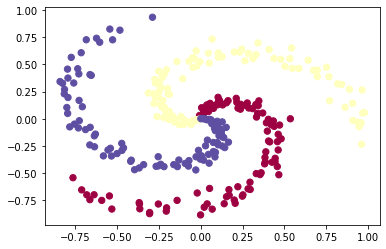

In [ ]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train, X_test = torch.from_numpy(X_train).type(torch.float) ,torch.from_numpy(X_test).type(torch.float) 
y_train, y_test = torch.from_numpy(y_train).type(torch.LongTensor) ,torch.from_numpy(y_test).type(torch.LongTensor)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [ ]:
X_train[:1], y_train[:1]

(tensor([[ 0.0872, -0.3113]]), tensor([2]))

## Model design

In [ ]:
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer_1 = nn.Linear(2,15)
    self.Layer_2 = nn.Linear(15,15)
    self.Layer_3 = nn.Linear(15,15)
    self.Layer_4 = nn.Linear(15,3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.Layer_4(self.relu(self.Layer_3(self.relu(self.Layer_2(self.Layer_1(x))))))

model = SpiralModel()
model

SpiralModel(
  (Layer_1): Linear(in_features=2, out_features=15, bias=True)
  (Layer_2): Linear(in_features=15, out_features=15, bias=True)
  (Layer_3): Linear(in_features=15, out_features=15, bias=True)
  (Layer_4): Linear(in_features=15, out_features=3, bias=True)
  (relu): ReLU()
)

## Loss, ACC and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

## Training Loop

In [ ]:
torch.manual_seed(42)

epochs = 500

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%10 == 0:
    print(f"{epoch} {loss:.5f} {acc:.2f} {test_loss:.5f} {test_acc:.2f}")

0 0.03253 98.75 0.26740 96.67
10 0.03242 98.75 0.26772 96.67
20 0.03237 98.75 0.26803 96.67
30 0.03230 98.75 0.26834 96.67
40 0.03222 98.75 0.26869 96.67
50 0.03215 98.75 0.26906 96.67
60 0.03219 98.75 0.26931 96.67
70 0.03214 98.75 0.26974 96.67
80 0.03208 98.75 0.27013 96.67
90 0.03201 98.75 0.27049 96.67
100 0.03193 98.75 0.27078 96.67
110 0.03187 98.75 0.27118 96.67
120 0.03178 98.75 0.27154 96.67
130 0.03172 98.75 0.27190 96.67
140 0.03167 98.75 0.27232 96.67
150 0.03164 98.75 0.27274 96.67
160 0.03158 98.75 0.27309 96.67
170 0.03153 98.75 0.27346 96.67
180 0.03147 98.75 0.27381 96.67
190 0.03142 98.75 0.27418 96.67
200 0.03136 98.75 0.27454 96.67
210 0.03131 98.75 0.27488 96.67
220 0.03125 98.75 0.27522 96.67
230 0.03120 98.75 0.27556 96.67
240 0.03112 98.75 0.27591 96.67
250 0.03107 98.75 0.27625 96.67
260 0.03102 98.75 0.27659 96.67
270 0.03096 98.75 0.27690 96.67
280 0.03103 98.75 0.27712 96.67
290 0.03097 99.17 0.27746 96.67
300 0.03089 98.75 0.27770 96.67
310 0.03080 99.17 0

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


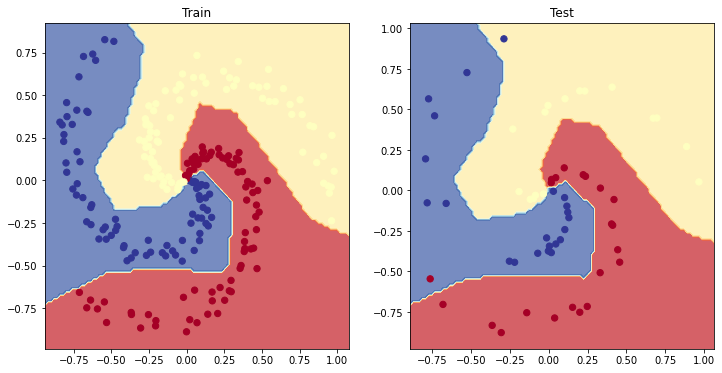

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)